In [3]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [57]:
directory1 = 'D:/IST/5 ano/2 semestre/Tese/fluidic-sensor/data/human trials'
directory2 = 'D:/IST/5 ano/2 semestre/Tese/fluidic-sensor/data/human trials 2'
directory = directory1

In [59]:
human_trials = []
for i, trial in enumerate(os.listdir(directory)):
    file_name = directory+'/human trial '+str(i+1)+'.txt'
    with open(file_name, 'r+') as f:
        trial = []
        i = 0
        while True:
            line = f.readline()
            if not line:
                break
            if i > 3:
                if int(line[6]) > 1:
                    trial.append(float(line[int(len(line)/2)::]))
            i += 1
    human_trials.append(trial)





ValueError: could not convert string to float: '007706       0.060000 \n'

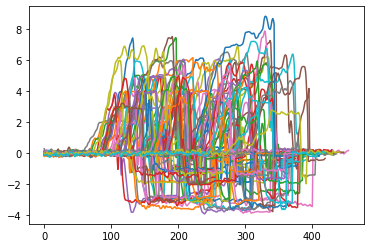

In [38]:
for i, trial in enumerate(human_trials):
    plt.plot(range(len(trial)), trial)


## Aligning with when the raspberry is off the stem 

In [47]:
off_stem = []
lengths = []
for trial in human_trials:
    lengths.append(len(trial))
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    off_stem.append(dif.index(min(dif)))

In [52]:
max_val = max(off_stem)
new_human_trials = []
for i, trial in enumerate(human_trials):
    if i != off_stem.index(max_val):
        extra = np.array([0]*(max_val-off_stem[i]))
        new_human_trials.append(np.append(extra, trial))


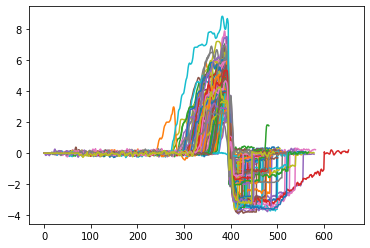

In [53]:
for i, trial in enumerate(new_human_trials):
    plt.plot(range(len(trial)), trial)

Text(0, 0.5, 'Raspberry twin measurement')

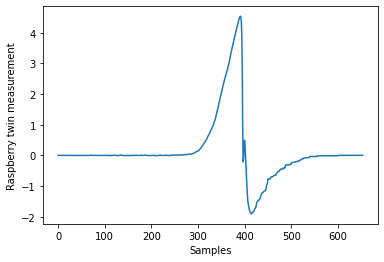

In [54]:
longest = 0
length = 0
picking_trials = new_human_trials
for i, trial in enumerate(picking_trials):
    if len(trial) > length:
        longest = i
        length = len(trial)

for i, trial in enumerate(picking_trials):
    picking_trials[i] = np.array(trial)
    if i != longest:
        picking_trials[i] = np.append(picking_trials[i], [0]*(length-len(trial)))

trials_array = np.array([picking_trials])[0]
mean = np.mean(trials_array, axis=0)
plt.plot(range(0, mean.shape[0]), mean)
plt.xlabel('Samples')
plt.ylabel('Raspberry twin measurement')

In [55]:
mean_str =[]
# name of csv file
filename = "average_human_harvest_2.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean.tolist())
    csvwriter.writerows(mean_str)

## Aligning with the beginning of the grasp

In [6]:
picking = []
for trial in human_trials:
    picking.append(np.where(np.floor(np.abs(trial)) > 0)[0][0])

In [7]:
max(picking)

379

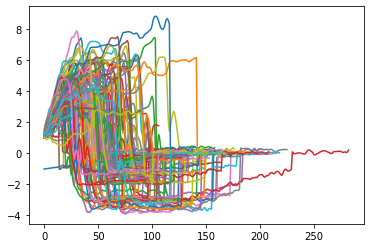

In [8]:
picking_trials = []
for i, trial in enumerate(human_trials):
    picking_trials.append(trial[picking[i]::])
    plt.plot(range(0, len(trial)-picking[i]), picking_trials[i])
    


Text(0, 0.5, 'Raspberry twin measurement')

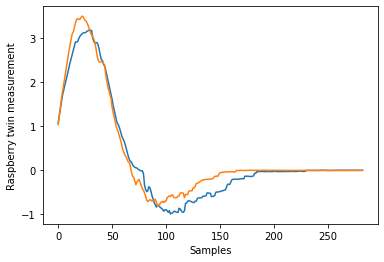

In [12]:
longest = 0
length = 0
for i, trial in enumerate(picking_trials):
    if len(trial) > length:
        longest = i
        length = len(trial)

for i, trial in enumerate(picking_trials):
    picking_trials[i] = np.array(trial)
    if i != longest:
        picking_trials[i] = np.append(picking_trials[i], [0]*(length-len(trial)))

trials_array = np.array([picking_trials])[0]
mean_train = np.mean(trials_array[0:49,:], axis=0)
mean_test = np.mean(trials_array[50::,:], axis=0)
plt.plot(range(0, mean_train.shape[0]), mean_train)
plt.plot(range(0, mean_test.shape[0]), mean_test)
plt.xlabel('Samples')
plt.ylabel('Raspberry twin measurement')

%f 1.05678735


In [14]:
mean_str =[]
# name of csv file
filename = "average_human_harvest_train.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean_train.tolist())
    csvwriter.writerows(mean_str)

mean_str =[]
# name of csv file
filename = "average_human_harvest_test.csv"
# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)
     
    # writing the data rows
    mean_str.append(str(x) for x in mean_test.tolist())
    csvwriter.writerows(mean_str)

In [5]:
harvest_ref = []
rows = []
filename = "average human harvest.csv"
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)

    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)

harvest_ref = [float(x) for x in rows[0]]
np.array(harvest_ref).shape[0]

283